## CIENCCIA DE DATOS EN PYTHON
### PROYECTO FINAL

### Estimacion de Modelo

Crear modelos predictivos de regresion lineal uni-variable sencillos

Los datos del proyecto pertenecen al ejemplo clasico y muy conocido al iniciar a estudiar ciencia de datos: prediccion de precios de casas.

###### Variables

-- SalePrice = el precio de venta de la propiedad en dolares. Variable objetivo que se necesita predecir.

-- OverallQual =  calidada de materiales y acabados. Califica el material general y el acabado de la casa.  
10 = Very Excellent;  9 = Excellent;  8 = Very Good;  7 = Good;  6 = Above Average;  5 = Average;  4 = Below Average;  3 = Fair;  2 = Poor;  1 = Very Poor

-- FlrSF1st = pies cuadrados del primer piso.

-- TotRmsAbvGrd = total habitaciones (no incluye banos).

-- YearBuilt = anio de construccion

-- LotFrontage: pies lineales de calle, conectada a la propiedad.

#### Paso No.1  
Exploracion de los datos

##### Librerias

In [503]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as seabornInstance

from sklearn.model_selection import train_test_split
from sklearn import linear_model

##### Carga de data

In [507]:
import numpy as np
data_proy = np.load('proyecto_training_data.npy')

In [508]:
dimension = data_proy.shape
dimension

(1460, 6)

In [509]:
rango = data_proy.ndim
rango

2

In [510]:
type(data_proy)

numpy.ndarray

##### Revision de la Data

###### Nombrar Variables

In [511]:
data_proy = pd.DataFrame(data=data_proy, columns=['SalePrice', 'OverallQual', 'FlrSF1st', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])

###### Reordenar variables

In [512]:
data_proy = data_proy[['SalePrice', 'YearBuilt', 'OverallQual', 'FlrSF1st', 'TotRmsAbvGrd', 'LotFrontage']]

###### Revisiones valores NaN

In [513]:
data_proy.isnull().any()

SalePrice       False
YearBuilt       False
OverallQual     False
FlrSF1st        False
TotRmsAbvGrd    False
LotFrontage      True
dtype: bool

###### Eliminar Valores NaN

In [514]:
data_proy = data_proy.fillna(method='ffill')
data_proy

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
0,208500.0,2003.0,7.0,856.0,8.0,65.0
1,181500.0,1976.0,6.0,1262.0,6.0,80.0
2,223500.0,2001.0,7.0,920.0,6.0,68.0
3,140000.0,1915.0,7.0,961.0,7.0,60.0
4,250000.0,2000.0,8.0,1145.0,9.0,84.0
...,...,...,...,...,...,...
1455,175000.0,1999.0,6.0,953.0,7.0,62.0
1456,210000.0,1978.0,6.0,2073.0,7.0,85.0
1457,266500.0,1941.0,7.0,1188.0,9.0,66.0
1458,142125.0,1950.0,5.0,1078.0,5.0,68.0


In [515]:
data_proy.isnull().any()

SalePrice       False
YearBuilt       False
OverallQual     False
FlrSF1st        False
TotRmsAbvGrd    False
LotFrontage     False
dtype: bool

###### Revision de la data

In [516]:
data_proy.head()

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
0,208500.0,2003.0,7.0,856.0,8.0,65.0
1,181500.0,1976.0,6.0,1262.0,6.0,80.0
2,223500.0,2001.0,7.0,920.0,6.0,68.0
3,140000.0,1915.0,7.0,961.0,7.0,60.0
4,250000.0,2000.0,8.0,1145.0,9.0,84.0


###### Revision de Relaciones

In [517]:
#sns.pairplot(data_proy)

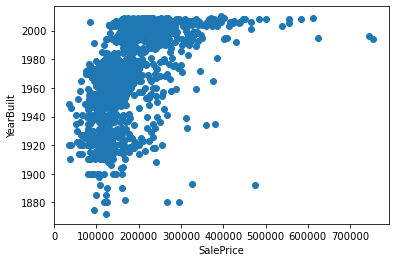

In [518]:
plt.scatter(data_proy['SalePrice'], data_proy['YearBuilt'])
plt.xlabel('SalePrice')
plt.ylabel('YearBuilt')
plt.show()

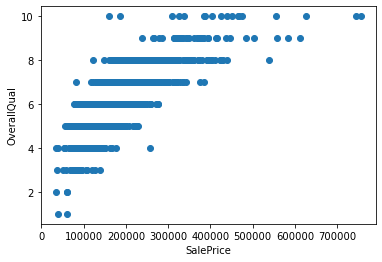

In [519]:
plt.scatter(data_proy['SalePrice'], data_proy['OverallQual'])
plt.xlabel('SalePrice')
plt.ylabel('OverallQual')
plt.show()

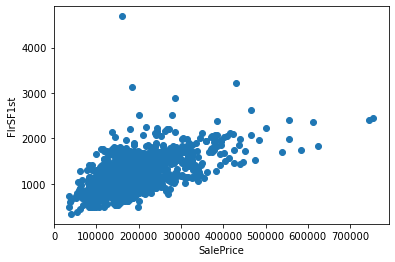

In [520]:
plt.scatter(data_proy['SalePrice'], data_proy['FlrSF1st'])
plt.xlabel('SalePrice')
plt.ylabel('FlrSF1st')
plt.show()

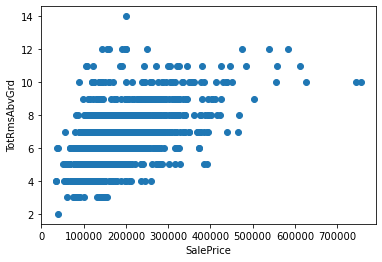

In [521]:
plt.scatter(data_proy['SalePrice'], data_proy['TotRmsAbvGrd'])
plt.xlabel('SalePrice')
plt.ylabel('TotRmsAbvGrd')
plt.show()

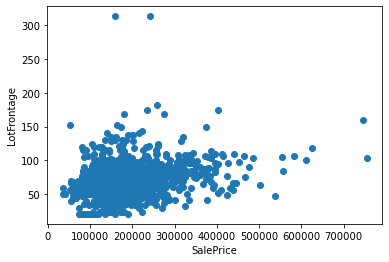

In [522]:
plt.scatter(data_proy['SalePrice'], data_proy['LotFrontage'])
plt.xlabel('SalePrice')
plt.ylabel('LotFrontage')
plt.show()

#### Paso No.2  
Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %)

#### Separacion de la data

In [490]:
Y = data_proy['SalePrice'].values.reshape(-1, 1)
Y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

In [491]:
X = data_proy.iloc[:, 1:6].values
X

array([[2003.,    7.,  856.,    8.,   65.],
       [1976.,    6., 1262.,    6.,   80.],
       [2001.,    7.,  920.,    6.,   68.],
       ...,
       [1941.,    7., 1188.,    9.,   66.],
       [1950.,    5., 1078.,    5.,   68.],
       [1965.,    5., 1256.,    6.,   75.]])

##### Set de entrenamiento

In [492]:
from sklearn.model_selection import train_test_split
dataTrain, dataTest, dataTrain_SaleP, dataTest_SaleP = train_test_split(X, Y, test_size = 0.2, shuffle=True, random_state=123)

In [493]:
dataTrain

array([[1993.,    7., 1372.,    9.,   90.],
       [1960.,    6., 1429.,    7.,   81.],
       [1977.,    6., 1542.,   11.,   50.],
       ...,
       [1968.,    7., 2156.,    9.,   50.],
       [1972.,    5.,  768.,    5.,   70.],
       [1941.,    6.,  869.,    6.,   60.]])

In [494]:
dataTrain_SaleP

array([[260000.],
       [181900.],
       [272000.],
       ...,
       [262500.],
       [133000.],
       [131000.]])

##### Set de validacion y pruebas

In [495]:
dataTest

array([[2001.,    7.,  884.,    8.,   51.],
       [1900.,    4., 1095.,    8.,   60.],
       [2004.,    7.,  976.,    7.,   32.],
       ...,
       [1949.,    5.,  672.,    6.,   60.],
       [1969.,    5., 1040.,    9.,   70.],
       [1941.,    5.,  616.,    5.,   60.]])

In [496]:
#dataTest_SaleP

#### Paso No.3

#### Analisis Exploratorio de los datos  
Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas): media, valor maximo, valor minimo, rango y desviacion estandar.


In [111]:
# Informacion estadistica de la data
data_proy.describe()

,SalePrice,YearBuilt,OverallQual,FlrSF1st,TotRmsAbvGrd,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,1971.267808,6.099315,1162.626712,6.517808,70.104795
std,79442.502883,30.202904,1.382997,386.587738,1.625393,23.846996
min,34900.000000,1872.000000,1.000000,334.000000,2.000000,21.000000
25%,129975.000000,1954.000000,5.000000,882.000000,5.000000,59.000000
50%,163000.000000,1973.000000,6.000000,1087.000000,6.000000,70.000000
75%,214000.000000,2000.000000,7.000000,1391.250000,7.000000,80.000000
max,755000.000000,2010.000000,10.000000,4692.000000,14.000000,313.000000


##### Variable 1 = SalePrice

In [142]:
print('Media SalePrice:', data_proy["SalePrice"].mean())
print('Desviacion Estandar SalePrice:', data_proy["SalePrice"].std(ddof=1))
print('Valor Minimo SalePrice:', data_proy["SalePrice"].min())
print('Valor Maximo SalePrice:', data_proy["SalePrice"].max())
print('Rango SalePrice:', data_proy["SalePrice"].max() - data_proy["SalePrice"].min())

Media SalePrice: 180921.19589041095
Desviacion Estandar SalePrice: 79442.50288288663
Valor Minimo SalePrice: 34900.0
Valor Maximo SalePrice: 755000.0
Rango SalePrice: 720100.0


In [162]:
#Comprobacion
#data_proy.describe()['SalePrice']

##### Variable 2 = YearBuilt

In [146]:
print('Media YearBuilt:', data_proy["YearBuilt"].mean())
print('Desviacion Estandar YearBuilt:', data_proy["YearBuilt"].std(ddof=1))
print('Valor Minimo YearBuilt:', data_proy["YearBuilt"].min())
print('Valor Maximo YearBuilt:', data_proy["YearBuilt"].max())
print('Rango YearBuilt:', data_proy["YearBuilt"].max() - data_proy["YearBuilt"].min())

Media YearBuilt: 1971.267808219178
Desviacion Estandar YearBuilt: 30.202904042525265
Valor Minimo YearBuilt: 1872.0
Valor Maximo YearBuilt: 2010.0
Rango YearBuilt: 138.0


In [163]:
#Comprobacion
#data_proy.describe()['YearBuilt']

##### Variable 3 = OverallQual

In [151]:
print('Media OverallQual:', data_proy["OverallQual"].mean())
print('Desviacion Estandar:', data_proy["OverallQual"].std(ddof=1))
print('Valor Minimo OverallQual:', data_proy["OverallQual"].min())
print('Valor Maximo OverallQual:', data_proy["OverallQual"].max())
print('Rango OverallQual:', data_proy["OverallQual"].max() - data_proy["OverallQual"].min())

Media OverallQual: 6.0993150684931505
Desviacion Estandar: 1.3829965467415923
Valor Minimo OverallQual: 1.0
Valor Maximo OverallQual: 10.0
Rango OverallQual: 9.0


In [164]:
#Comprobacion
#data_proy.describe()['OverallQual']

##### Variable 4 = FlrSF1st

In [153]:
print('Media FlrSF1st:', data_proy["FlrSF1st"].mean())
print('Desviacion Estandar:', data_proy["FlrSF1st"].std(ddof=1))
print('Valor Minimo FlrSF1st:', data_proy["FlrSF1st"].min())
print('Valor Maximo FlrSF1st:', data_proy["FlrSF1st"].max())
print('Rango FlrSF1st:', data_proy["FlrSF1st"].max() - data_proy["FlrSF1st"].min())

Media FlrSF1st: 1162.626712328767
Desviacion Estandar: 386.5877380410738
Valor Minimo FlrSF1st: 334.0
Valor Maximo FlrSF1st: 4692.0
Rango FlrSF1st: 4358.0


In [165]:
#Comprobacion
#data_proy.describe()['FlrSF1st']

##### Variable 5 = TotRmsAbvGrd

In [155]:
print('Media TotRmsAbvGrd:', data_proy["TotRmsAbvGrd"].mean())
print('Desviacion Estandar TotRmsAbvGrd:', data_proy["TotRmsAbvGrd"].std(ddof=1))
print('Valor Minimo TotRmsAbvGrd:', data_proy["TotRmsAbvGrd"].min())
print('Valor Maximo TotRmsAbvGrd:', data_proy["TotRmsAbvGrd"].max())
print('Rango:', data_proy["TotRmsAbvGrd"].max() - data_proy["TotRmsAbvGrd"].min())

Media TotRmsAbvGrd: 6.517808219178082
Desviacion Estandar TotRmsAbvGrd: 1.625393290584064
Valor Minimo TotRmsAbvGrd: 2.0
Valor Maximo TotRmsAbvGrd: 14.0
Rango: 12.0


In [166]:
# Comprobacion
#data_proy.describe()['TotRmsAbvGrd']

##### Variable 6 = LotFrontage

In [161]:
print('Media LotFrontage:', data_proy["LotFrontage"].mean())
print('Desviacion Estandar:', data_proy["LotFrontage"].std(ddof=1))
print('Valor Minimo LotFrontage:', data_proy["LotFrontage"].min())
print('Valor Maximo LotFrontage:', data_proy["LotFrontage"].max())
print('Rango:', data_proy["LotFrontage"].max() - data_proy["LotFrontage"].min())

Media LotFrontage: 70.10479452054794
Desviacion Estandar: 23.846995813891137
Valor Minimo LotFrontage: 21.0
Valor Maximo LotFrontage: 313.0
Rango: 292.0


In [167]:
# Comprobacion
#data_proy.describe()['LotFrontage']

#### Paso No.4  
Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.
1) SalePrice  
2) YearBuilt  
3) OverallQual  
4) FlrSF1st  
5) TotRmsAbvGrd  
6) LotFrontage

#### Generacion de Histogramas  

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Variable SalePrice

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

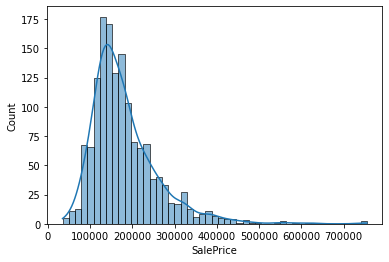

In [214]:
sns.histplot(data = data_proy["SalePrice"], x = data_proy["SalePrice"], kde=True)

##### Variable YearBuilt

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

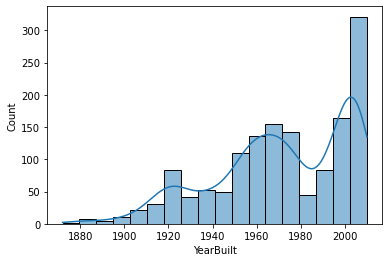

In [215]:
sns.histplot(data = data_proy["YearBuilt"], x = data_proy["YearBuilt"], kde=True)

##### Variable OverallQual

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

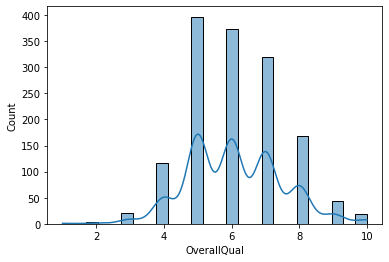

In [216]:
sns.histplot(data = data_proy["OverallQual"], x = data_proy["OverallQual"], kde=True)

##### Variable FlrSF1st

<AxesSubplot:xlabel='FlrSF1st', ylabel='Count'>

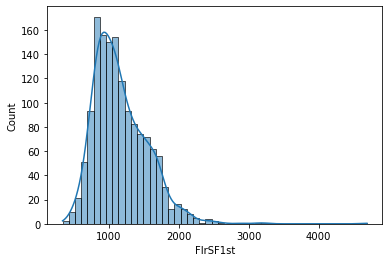

In [217]:
sns.histplot(data = data_proy["FlrSF1st"], x = data_proy["FlrSF1st"], kde=True)

##### Variable TotRmsAbvGrd

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

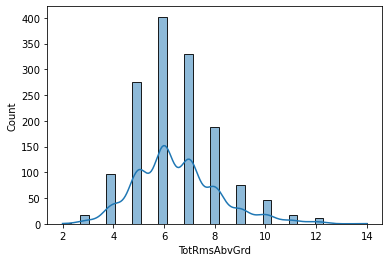

In [219]:
sns.histplot(data = data_proy["TotRmsAbvGrd"], x = data_proy["TotRmsAbvGrd"], kde=True)

##### Variable LotFrontage

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

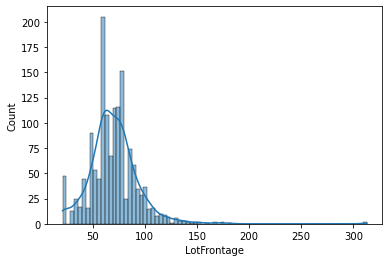

In [220]:
sns.histplot(data = data_proy["LotFrontage"], x = data_proy["LotFrontage"], kde=True)

#### Paso No.5 Regresion  
Para cada variable independiente X :

1) Calcular el coeficiente de correlacion entre X y Y,  
2) Graficar X vs Y (scatterplot) usando matplotlib,  
3) Colocar el coeficiente de correlacion y colocarlo como parte del tıtulo de la grafica,  
4) Basado en la grafica y el coeficiente de correlacion de cada par X ,Y elegir las 2 variables con mas potencial predictivo.
Es decir las 2 variables que presentan mayor correlacionentre dicha variable y la variable dependiente.

In [290]:
#sns.pairplot(data_proy)

In [505]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
#Base de datos
#dataTrain
#dataTest
#dataTrain_SaleP
#dataTest_SaleP

##### Regresion Lineal Multiple

In [523]:
YM = data_proy['SalePrice'].values.reshape(-1, 1)
XM = data_proy.iloc[:, 1:6].values.reshape(-1, 5)

dataTrain, dataTest, dataTrain_SaleP, dataTest_SaleP = train_test_split(XM, YM, test_size = 0.2, shuffle=True, random_state=123)

lmm = LinearRegression()
lmm.fit(XM, YM)
lmm.coef_
lmm.intercept_
print('R2:', lmm.score(dataTrain, dataTrain_SaleP))

R2: 0.7279345706773444


##### Regresion Lineal Simple

##### X1 = YearBuilt

In [565]:
X1 = dataTrain[:, np.newaxis, 0]
X1t = dataTest[:, np.newaxis, 0]
Y0 = dataTrain_SaleP

lm1 = LinearRegression()
lm1.fit(X1, Y0)
Y1 = lm1.predict(X1t)

print('Coeficiente_X1:', lm1.coef_)
print('Intercepto_X1:', lm1.intercept_)
print('R2_X1:', lm1.score(X1t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y1)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y1[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))


Coeficiente_X1: [[1374.17806927]]
Intercepto_X1: [-2527649.07554854]
R2_X1: 0.26656816000756756
Mean Squared Error 4532326388.98649


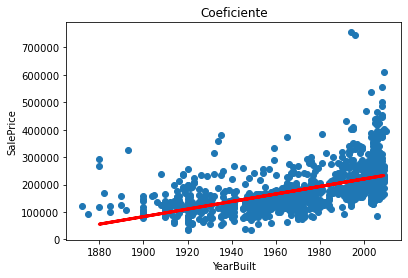

In [583]:
plt.scatter(X1, Y0)
plt.title('Coeficiente')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.plot(X1t, Y1, color='red', linewidth=3)

##### X2 = OverallQual

In [568]:
X2 = dataTrain[:, np.newaxis, 1]
X2t =  dataTest[:, np.newaxis, 1]
Y0 = dataTrain_SaleP
lm2 = LinearRegression()
lm2.fit(X2, Y0)
Y2 = lm2.predict(X2t)

print('Coeficiente_X2:', lm2.coef_)
print('Intercepto_X2:', lm2.intercept_)
print('R2_X2:', lm2.score(X2t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y2)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y2[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))


Coeficiente_X2: [[44813.4594101]]
Intercepto_X2: [-92345.76508706]
R2_X2: 0.6378891970225264
Mean Squared Error 2237705344.3559594


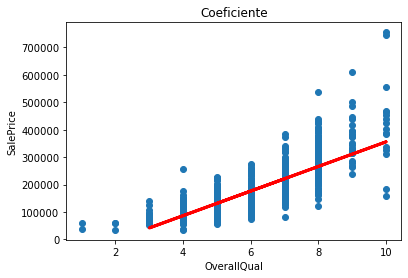

In [569]:
plt.scatter(X2, Y0)
plt.title('Coeficiente')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.plot(X2t, Y2, color='red', linewidth=3)

##### X3 = FlrSF1st

In [570]:
X3 = dataTrain[:, np.newaxis, 2]
X3t = dataTest[:, np.newaxis, 2]
Y0 = dataTrain_SaleP
lm3 = LinearRegression()
lm3.fit(X3, Y0)
Y3 = lm3.predict(X3t)

print('Coeficiente_X3:', lm3.coef_)
print('Intercepto_X3:', lm3.intercept_)
print('R2_X3:', lm3.score(X3t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y3)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y3[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))

Coeficiente_X3: [[124.63473898]]
Intercepto_X3: [35077.7487892]
R2_X3: 0.2951740790681032
Mean Squared Error 4355552822.896674


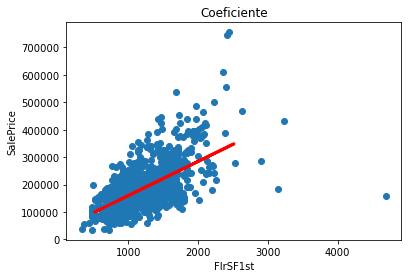

In [577]:
plt.scatter(X3, Y0)
plt.title('Coeficiente')
plt.xlabel('FlrSF1st')
plt.ylabel('SalePrice')
plt.plot(X3t, Y3, color='red', linewidth=3)

##### X4 = TotRmsAbvGrd

In [556]:
X4 = dataTrain[:, np.newaxis, 3]
X4t = dataTest[:, np.newaxis, 3]
Y0 = dataTrain_SaleP
lm4 = LinearRegression()
lm4.fit(X4, Y0)
Y4 = lm4.predict(X4t)

print('Coeficiente_X4:', lm4.coef_)
print('Intercepto_X4:', lm4.intercept_)
print('R2_X4:', lm4.score(X4t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y4)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y4[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))

Coeficiente_X4: [[25155.38306682]]
Intercepto_X4: [16194.83369227]
R2_X4: 0.34154368862672024
Mean Squared Error 4069006488.8137574


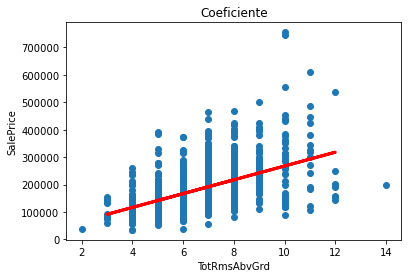

In [579]:
plt.scatter(X4, Y0)
plt.title('Coeficiente')
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.plot(X4t, Y4, color='red', linewidth=3)

##### X5 = LotFrontage

In [580]:
X5 = dataTrain[:, np.newaxis, 4]
X5t = dataTest[:, np.newaxis, 4]
Y0 = dataTrain_SaleP
lm5 = LinearRegression()
lm5.fit(X5, Y0)
Y5 = lm5.predict(X5t)

print('Coeficiente_X5:', lm5.coef_)
print('Intercepto_X5:', lm5.intercept_)
print('R2_X5:', lm5.score(X5t, dataTest_SaleP))

mse = metrics.mean_squared_error(dataTest_SaleP, Y5)
print("Mean Squared Error {}".format(mse))
#print("Predicciones {}".format(Y5[:5]))
#print("Valores Reales {}".format(dataTest_SaleP[:5]))

Coeficiente_X5: [[1115.95485882]]
Intercepto_X5: [103226.99839941]
R2_X5: 0.033333091064838394
Mean Squared Error 5973629316.082104


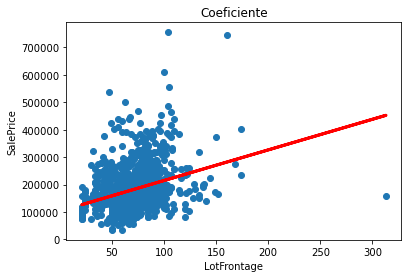

In [582]:
plt.scatter(X5, Y0)
plt.title('Coeficiente')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.plot(X5t, Y5, color='red', linewidth=3)

Con la informacion proporcionada para realizar el analisis de datos y estuadiado el comportamiento de cada uno de las variables que componen los datos, se puede concluir de acuerdo a la bondada de ajuste de los modelos estimados las variables se comportaron de la siguiente manera:

1) Anio de construccion (YearBuilt) = 0.26656816000756756  
2) Calidada de materiales y acabados (OverallQual) = 0.6378891970225264  
3) Pies cuadrados del primer piso (FlrSF1st) = 0.2951740790681032  
4) Total habitaciones (TotRmsAbvGrd) = 0.34154368862672024  
5) Pies lineales de calle (LotFrontage) = 0.033333091064838394 


In [ ]:
#### Paso No.6 Crear Funcion  
Crear una funcion para entrenar un modelo de regresion lineal de una variable y = β0 +β1 ∗x.

In [ ]:
#Base de datos
#dataTrain
#dataTest
#dataTrain_SaleP
#dataTest_SaleP

In [592]:
X1 = dataTrain[:, np.newaxis, 0]
X1t = dataTest[:, np.newaxis, 0]
Y0 = dataTrain_SaleP

In [594]:
#Vectorizacion de Variables
#Vector con la variable independiente x,
def vectorizacion(x):
    n = len(x)
    x = np.hstack([x, np.ones_like(x)])
    return x

print(vectorizacion(X1))       

[[1.993e+03 1.000e+00]
 [1.960e+03 1.000e+00]
 [1.977e+03 1.000e+00]
 ...
 [1.968e+03 1.000e+00]
 [1.972e+03 1.000e+00]
 [1.941e+03 1.000e+00]]


In [596]:
#Vectorizacion de Variables
#Vector con la variable dependiente y,
def vectorizacion(y):
    n = len(y)
    y = np.hstack([y, np.ones_like(y)])
    return y

print(vectorizacion(Y0)) 

[[2.600e+05 1.000e+00]
 [1.819e+05 1.000e+00]
 [2.720e+05 1.000e+00]
 ...
 [2.625e+05 1.000e+00]
 [1.330e+05 1.000e+00]
 [1.310e+05 1.000e+00]]


In [ ]:
def funGrad(x, y, theta):
    m=len(x)
    x_b=np.hstack([x,np.ones_like(x)])
    b0_grad=np.sum((x_b.dot(theta) - y)) / (m)
    b1_grad=np.sum(np.transpose((x_b.dot(theta) - y)) * (np.transpose(np.transpose(x_b)[1]))) / (m)
    return b1_grad,b0_grad
print(funGrad(X_train,y_train,[[134],[25]]))

In [585]:
#Separar los datos en 2 datasets
from sklearn.model_selection import train_test_split

def ValidacionPrueba(self, test_size):
    A = self.data['SalePrice'].values.reshape(-1, 1)
    B = self.data.iloc[:, 1:6].values
    self.dataTrain, self.dataTest, self.dataTrain_SaleP, self.dataTest_SaleP = train_test_split(X, Y, est_size = test_size, shuffle=True, random_state=123)

#Crear un Objeto relacionado con la Clase
#objeto. nombre de la clase. nombre del atributo
#modelo = regresion(X, Y)

#objeto. nombre de la clase. nombre del atributo
#modelo = regression.from_file(proy)
#print(modelo.ValidacionPrueba(0.20))


In [ ]:
#Paso No.4 Histogramas

def histogram(self, plot):
    
        sns.histplot(data = data_proy["TotRmsAbvGrd"], x = data_proy["TotRmsAbvGrd"], kde=True)
       
         
#Crear un Objeto relacionado con la Clase
#objeto. nombre de la clase. nombre del atributo
modelo = regression.from_file(proy)
print(modelo.histogram())


In [588]:
# Predicciones
def predict(self, input_value):
    if input_value == None:
        result = self.linealmodel.fit(self.dataTest)
    else:
        result = self.linealmodel.fit(np.array([input_values]))
    return result